In [1]:
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle



from cc_model.wl import WL

In [3]:

nodes = list(range(0,9))
#edges = [(0,2), (1,3),  (2,5), (3,4), (4,6), (4,7), (5,8), (5,9), (6,10), (7,10), (8,9), ]
edges = [(2,5), (3,4), (4,6), (4,7), (5,8), (5,9), (6,10), (7,10), (8,9), ]
edges = [(i-2, j-2) for i,j in edges]
G1 = nx.Graph()
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

In [4]:
from itertools import product
def split_edges(G):
    edges = list(map(tuple, G.edges))
    print(G.edges)
    affected_edges = list(product([4,5,6,7], [4,5,6,7]))
    e1=[]
    e2=[]
    for edge in edges:
        if edge in affected_edges:
            print(edge[0])
            if edge[0] > edge[1]:
                e2.append(edge)
            else:
                e2.append((edge[1], edge[0]))
        else:
            e1.append(edge)
    #nodes = list(G.nodes)
    G2 = nx.Graph()
    G2.add_nodes_from(nodes)
    G2.add_edges_from(e1)

    G3 = nx.DiGraph()
    G3.add_nodes_from(nodes)
    G3.add_edges_from(e2)
    
    return G2, G3

In [5]:
G2, G3 = split_edges(G1)

[(0, 3), (1, 2), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (5, 8), (6, 7)]
6


In [69]:
#l = [0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3]
#l = [0, 0, 1, 1, 2, 2, 2, 2, 2]
_, wl_colors = WL(G1)
l = wl_colors[1]
color_map = ["orange", "green", "red", "blue"]
node_colors = [color_map[l[x]] for x in nodes]

In [70]:
plt.rcParams['hatch.linewidth'] = 10

In [71]:
edge_width = 6
with_labels=True
node_size=400
d=-0.6
pos = {0:(0,4),
       1:(0,2),
       2:(2,4),
       3:(2,2),
       4:(4,4),
       5:(4,2),
       6:(6,4-d),
       7:(6,4+d),
       8:(6,2-d),
       9:(6,2+d),
       10:(8,4)}
pos = {key-2:value for key, value in pos.items()}

def plot(G):
    G2, G3 = split_edges(G)
    recs = [#Rectangle((0, 2), 2, 2,),
             Rectangle((2, 2), 2, 2),
             Rectangle((4, 1.25), 2, 3.5),
             #Rectangle((6, 3.25), 2, 1.5)
            Rectangle((6, 1.25), 2, 3.5)
           ]
    ax=plt.gca()
    face_colors = ["orange", "green", "red"]
    edge_colors = face_colors[1:]+[face_colors[-1]]
    for rec, fc, ec in zip(recs, face_colors, edge_colors):
        if fc == ec:# Mono colored graph
            pc = PatchCollection([rec], alpha=0.6, facecolor=fc, edgecolor=None)
        else:
            pc = PatchCollection([rec], alpha=0.6, facecolor=fc, edgecolor=ec, hatch=r"/")


        # Add collection to axes
        ax.add_collection(pc)

    nx.draw(G2, pos, node_color=node_colors, with_labels=with_labels, width=edge_width, node_size=node_size)
    nx.draw_networkx_edges(
        G3, pos,
        connectionstyle="arc3,rad=0.5",  # <-- THIS IS IT
        arrowstyle="-",
        width = edge_width
    )

[(0, 3), (1, 2), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (5, 8), (6, 7)]
6


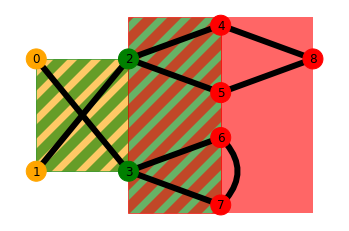

In [72]:
plot(G1)

In [10]:
WL(G1)

(6,
 [array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([0, 0, 1, 1, 2, 2, 2, 2, 2]),
  array([0, 0, 1, 1, 2, 2, 2, 2, 3]),
  array([0, 0, 1, 1, 2, 2, 3, 3, 4]),
  array([0, 0, 1, 2, 3, 3, 4, 4, 5]),
  array([0, 1, 2, 3, 4, 4, 5, 5, 6])])

In [11]:
G1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

In [12]:
from cc_model.fast_graph import FastGraph
import numpy as np

In [13]:
G = FastGraph(np.array(edges, np.uint32), False)
G.ensure_edges_prepared()
print(repr(G.edges))
print(G.edges_classes.T)
print(G.calc_wl_arr())

resetting
array([[1, 2],
       [0, 3],
       [2, 4],
       [2, 5],
       [3, 6],
       [3, 7],
       [6, 7],
       [4, 8],
       [5, 8]], dtype=uint32)
[[0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 2 2 2]
 [0 0 1 1 1 1 2 3 3]
 [0 0 1 1 2 2 3 4 4]
 [0 1 2 2 3 3 4 5 5]
 [0 1 2 2 3 3 4 5 5]]
[[0 0 0 0 0 0 0 0 0]
 [0 0 1 1 2 2 2 2 2]
 [0 0 1 1 2 2 2 2 3]
 [0 0 1 1 2 2 3 3 4]
 [0 0 1 2 3 3 4 4 5]
 [0 1 2 3 4 4 5 5 6]]


In [14]:
arr1 = np.array([1], dtype=np.uint32)
print(arr1.dtype==np.uint32)

arr2 = np.array([1], dtype=np.uint64)
print(arr2.dtype==np.uint32)


arr1 = np.array([1], dtype=np.uint32)
print(arr1.dtype==np.uint32)
arr1 = np.array([1], dtype=np.uint32)
print(arr1.dtype==np.uint32)

True
False
True
True


[[1 2]
 [0 3]
 [2 4]
 [2 5]
 [3 6]
 [3 7]
 [6 7]
 [4 8]
 [5 8]]
6


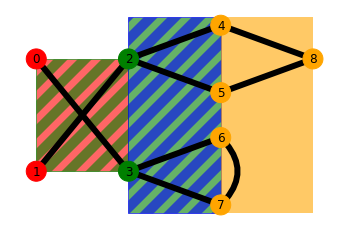

In [15]:
plot(G)

[[0 2]
 [2 6]
 [6 9]]
{0: False, 2: True}
0 2
2 6
6 9
[[1 3]
 [0 2]
 [2 6]
 [2 7]
 [3 5]
 [3 4]
 [6 8]
 [4 7]
 [5 8]]
4


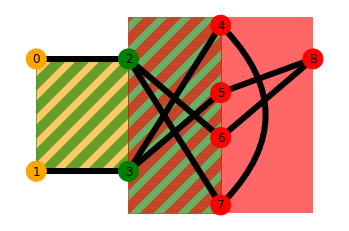

In [73]:
G.rewire(1)
plot(G)